# lista 4

In [4]:
import numpy as np, matplotlib.pyplot as plt, random

## zadanie 1

In [6]:
mc = 1000
ns = np.linspace(1000, 10000, 10)
mi = 0
sigma = 1

In [34]:
print(n)

[ 1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000. 10000.]


In [5]:
teoretyczna = np.exp(1/2*(sigma**2 + 2*mi))
vars = []
Ys_ = {}

In [6]:
for i in range(mc):
    for k in n:
        X = np.random.normal(mi, sigma, int(k))
        Y = np.exp(X)
        y_ = 1/k * sum(Y)
        if k not in Ys_:
            Ys_[int(k)] = [y_]
        else:
            Ys_[int(k)].append(y_)
        # var = np.var(y_)


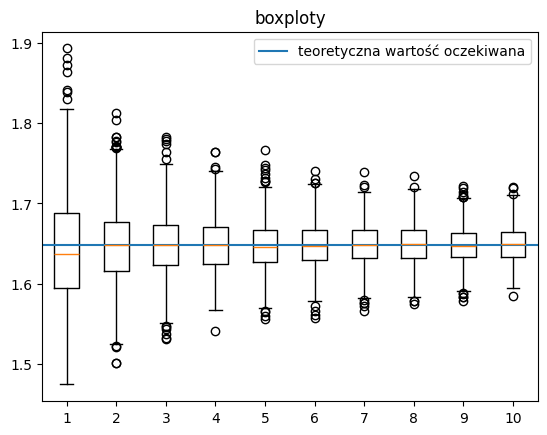

In [7]:
plt.boxplot(Ys_.values())
plt.axhline(y=teoretyczna, label = 'teoretyczna wartość oczekiwana')
plt.title('boxploty')
plt.legend()
plt.show()

In [8]:
for i in Ys_.values():
    vars.append(np.var(i))

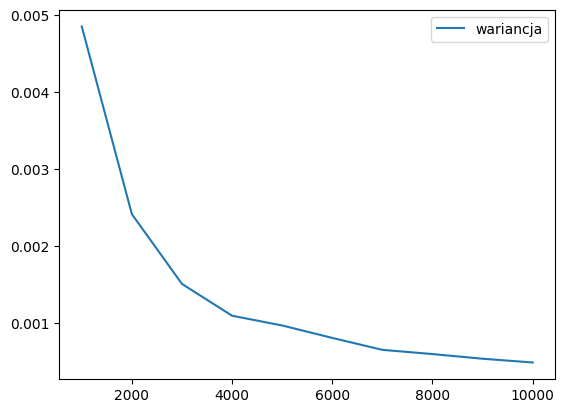

In [9]:
plt.plot(n,vars, label = 'wariancja')
plt.legend()
plt.show()

# zadanie 2

In [10]:
def F_u(u, Fx, n=1000):
    return Fx(u)**n


In [11]:
def f_u(u, Fx, fx, n=1000):
    return n*Fx(u)**(n-1)*fx(u)

### a) rozkład normalny

$\mu = 0, \sigma = 1$

In [12]:
from scipy. stats import norm, lognorm, pareto
import seaborn as sns, random

In [13]:
mc = 1000
mi = 0
sigma = 1
Us = []
for i in range(mc):
    X = np.random.normal(mi, sigma, 1000)
    U = max(X)
    Us.append(U)


In [14]:
def fu(u, n=1000):
    # n*norm.cdf((u - mi)/sigma)**(n-1)/(np.sqrt(2*np.pi)*sigma)*np.exp(-(u-mi)**2/(2*sigma**2))
    return n*norm.cdf(u,mi,sigma)**(n-1)*norm.pdf(u,mi,sigma)

In [15]:
def Fu(u, n=1000):
    return norm.cdf((u-mi)/sigma)**n

In [16]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n
def drewdemp(X): # dystrybuanta empiryczna
    x_values = sorted(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values, label='empiryczna')
    plt.title('Wykres dystrybuant')
    
    plt.legend()
    plt.show()

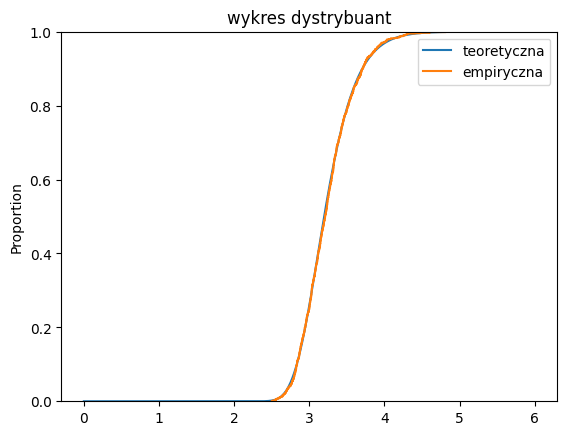

In [17]:
xs = np.linspace(0,6, 1000)
ys = sorted([Fu(x) for x in xs])
plt.plot(xs, ys, label= 'teoretyczna')
sns.ecdfplot(data = Us, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

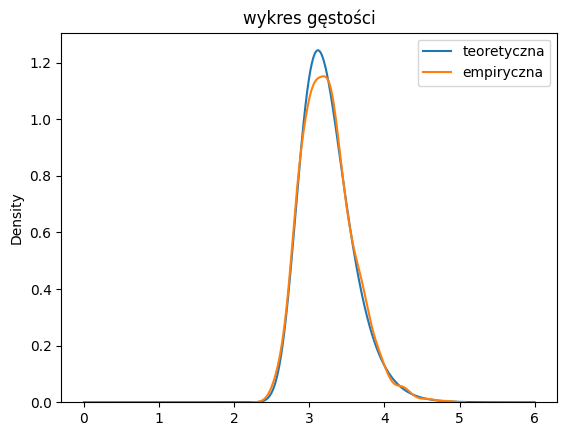

In [18]:
xs = np.linspace(0,6, 1000)
yss = [fu(x) for x in xs]
plt.plot(xs, yss, label= 'teoretyczna')
sns.kdeplot(data = Us, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

### b) rozkład log-normalny

$\mu =0, \sigma = 1$

In [19]:
mi = 0
sigma = 1

In [20]:
def fln(x):
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-1/2*(np.log(x)-mi)**2/sigma**2)

In [21]:
mc = 1000
mi = 0
sigma = 1
Us2 = []
for i in range(mc):
    Y = np.random.lognormal(mi, sigma, 1000)
    U = max(Y)
    Us2.append(U)

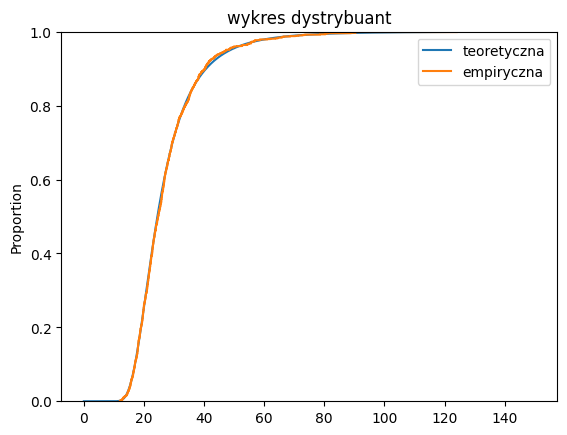

In [22]:
n=1000
xss = np.linspace(0,150, 1000)
ys = [lognorm.cdf(x,s=sigma,loc=0, scale=1)**n for x in xss]
plt.plot(xss, ys, label= 'teoretyczna')
sns.ecdfplot(data = Us2, label = 'empiryczna')
plt.legend()
plt.title('wykres dystrybuant')
plt.show()

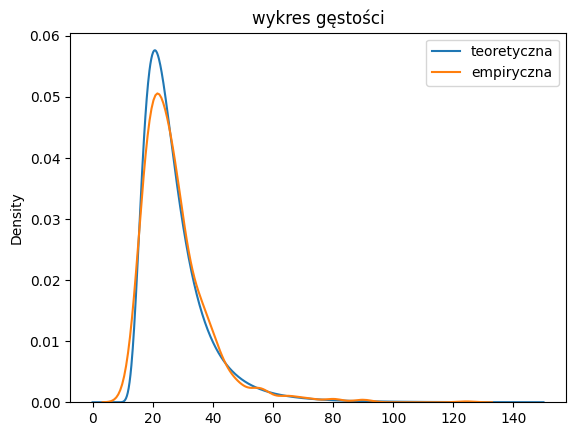

In [23]:
xss = np.linspace(0,150, 1000)
ys = [n*lognorm.cdf(x,s=sigma,loc=0, scale=1)**(n-1)*lognorm.pdf(x,s=sigma,loc=0, scale=1) for x in xss]
plt.plot(xss, ys, label= 'teoretyczna')
sns.kdeplot(data = Us2, label = 'empiryczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

### b) rozkład pareto

$\alpha =6, \lambda = 2$

In [24]:
mc = 1000
n = 1000
alfa = 2
lambd = 1
Us3 = []
for i in range(mc):
    us = [random.random() for _ in range(n)]
    Z = [lambd*((1-u)**(-1/alfa)-1) for u in us]
    U = max(Z)
    Us3.append(U)

(array([954.,  34.,   6.,   1.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  11.93151303,  152.43384035,  292.93616767,  433.438495  ,
         573.94082232,  714.44314964,  854.94547696,  995.44780428,
        1135.9501316 , 1276.45245892, 1416.95478624, 1557.45711356,
        1697.95944088, 1838.4617682 , 1978.96409552, 2119.46642284,
        2259.96875016, 2400.47107748, 2540.9734048 , 2681.47573212,
        2821.97805944, 2962.48038676, 3102.98271408, 3243.4850414 ,
        3383.98736872, 3524.48969604, 3664.99202336, 3805.49435068,
        3945.996678  , 4086.49900532, 4227.00133264, 4367.50365996,
        4508.00598728, 4648.5083146 , 4789.01064192, 4929.51296924,
        5070.01529656, 5210.51762388, 5351.019

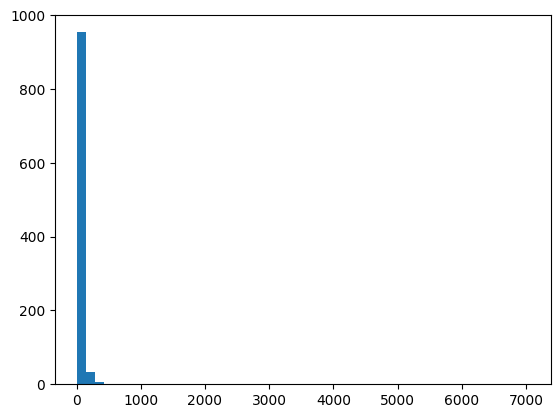

In [25]:
plt.hist(Us3, bins=50)

In [26]:
def fp(x,alfa = alfa, lambd=lambd):
    return alfa*lambd**alfa/(lambd+x)**(alfa+1)

In [27]:
def Fp(x,alfa=alfa,lambd=lambd):
    return 1- (lambd/(x+lambd))**alfa

In [28]:
def f(x, alfa, lambd):
    return 1000*Fp(x,alfa, lambd)**999*fp(x,alfa,lambd)

In [29]:
def F(x,alfa,lambd):
    return (Fp(x,alfa, lambd))**1000

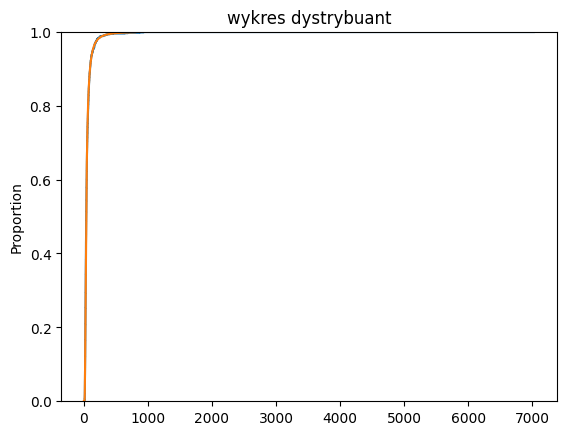

In [30]:
par = np.linspace(0, 800, 1000)
sns.ecdfplot(data=Us3, label='empiryczna')
plt.plot(par, F(par, alfa, lambd), label='teoretyczna')
plt.title('wykres dystrybuant')
plt.show()

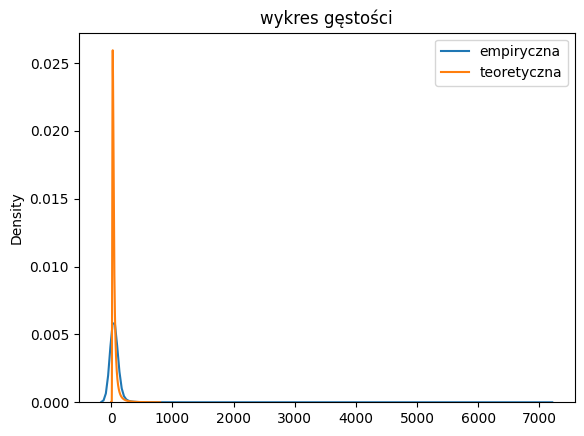

In [31]:
sns.kdeplot(data=Us3, label='empiryczna')
plt.plot(par, f(par, alfa, lambd), label='teoretyczna')
plt.legend()
plt.title('wykres gęstości')
plt.show()

## zadanie 3

Sprawdź czy estymator wariancji $$S_1 = \frac{1}{n} \sum^n_{i=1} (X_i − \overline X)^2$$ jest estymatorem nieobciążonym dla
rozkładu lognormalnego. Porównaj z estymatorem 
$$S_2 = \frac{1}{n-1} \sum_{i=1}^n (X_i − \overline X)^2$$

In [2]:
def lognorm_var(mi, sigma):
    return (np.exp(sigma**2) - 1)*(np.exp(2*mi + sigma**2))

In [3]:
def lognorm_E(mi, sigma):
    return np.exp(mi + sigma**2/2)

In [4]:
def S1(X):
    mean = np.mean(X)
    return 1/len(X) *sum((xi - mean)**2 for xi in X)

In [10]:
def S2(X):
    mean = np.mean(X)
    return 1/(len(X)-1) *sum((xi - mean)**2 for xi in X)

In [40]:
Xs = {}
for i in range(1000):
    for k in n:
        X = np.random.normal(mi, sigma, int(k))
        Y = np.exp(X)
        y_ = S1(Y)
        if k not in Xs:
            Xs[int(k)] = [y_]
        else:
            Xs[int(k)].append(y_)

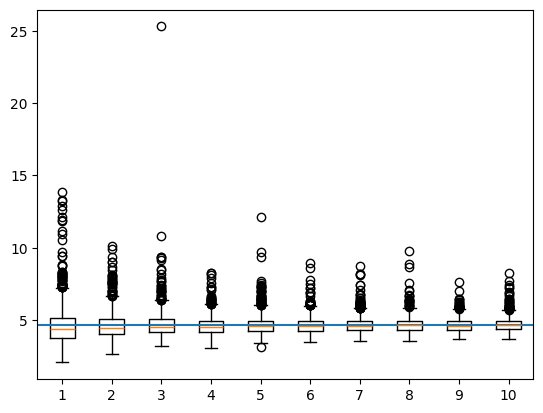

In [43]:
plt.boxplot(Xs.values())
plt.axhline(y=lognorm_var(mi, sigma))
plt.show()

In [44]:
Ys = {}
for i in range(1000):
    for k in n:
        X = np.random.normal(mi, sigma, int(k))
        Y = np.exp(X)
        y_ = S2(Y)
        if k not in Ys:
            Ys[int(k)] = [y_]
        else:
            Ys[int(k)].append(y_)

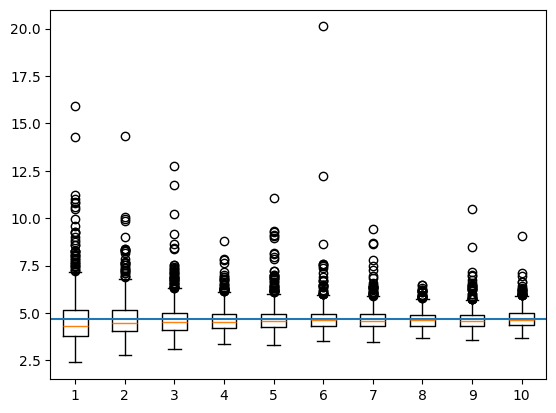

In [45]:
plt.boxplot(Ys.values())
plt.axhline(y=lognorm_var(mi, sigma))
plt.show()

## zadanie 5

X ~ $L(0, \frac{1}{\lambda}), ~\lambda = 2$ \
$\hat\lambda$

In [1]:
def lambda_hat(X):
    return n/sum(abs(xi) for xi in X)

In [7]:
l = 2
n =1000

lambdy = []
for i in range(n):
    Y1 = np.random.exponential(1/l, n)
    Y2 = np.random.exponential(1/l, n)
    X = Y1-Y2
    lambdy.append(lambda_hat(X))

Text(0.5, 1.0, 'boxplot estymatora')

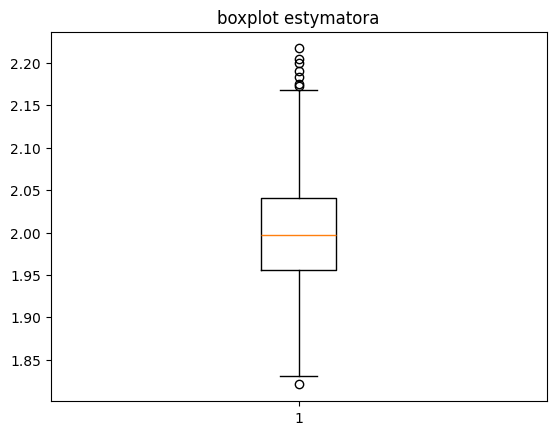

In [9]:
plt.boxplot(lambdy)
plt.title('boxplot estymatora')

## zadanie 6

$\hat{x}_0 = min(x_i)$ \
$\hat\alpha = \frac{n}{\sum_{i=1}^n \ln|x_i| -n \ln x_i}$

In [10]:
def F_1pareto(x0, alpha, n):
    us = [random.random() for _ in range(n)]
    return [x0*((1-u)**(-1/alpha)) for u in us]

In [13]:
def x0_hat(X):
    return min(X)

In [22]:
def alpha_hat(X, x0=1):
    return n/sum(np.log(abs(xi)) - n*np.log(x0) for xi in X)

In [20]:
x0 = 1
alpha = 4
n = 1000
x0s = []
alphas = []
for i in range(n):
    pareto_sample = F_1pareto(x0, alpha, n)
    x0hat = x0_hat(pareto_sample)
    x0s.append(x0hat)
    alfahat = alpha_hat(pareto_sample)
    alphas.append(alfahat)

Text(0.5, 1.0, 'x0')

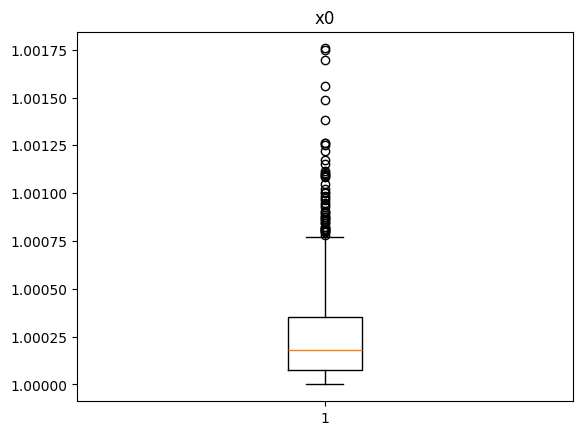

In [17]:
plt.boxplot(x0s)
plt.title('x0')

Text(0.5, 1.0, 'alpha')

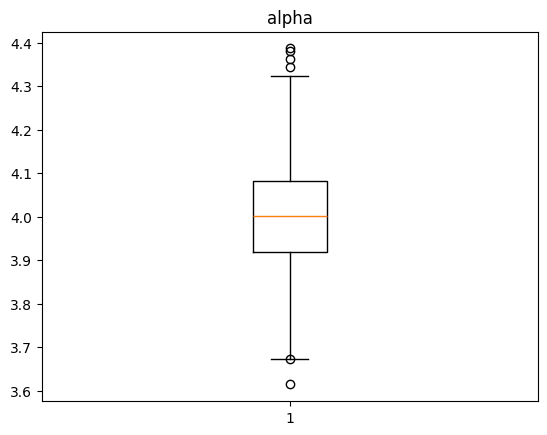

In [21]:
plt.boxplot(alphas)
plt.title('alpha')

## zadanie 7

$$f(x) = e^{-(x- \theta)}, ~x>\theta $$

In [23]:
theta = 2
X = np.random.exponential(1, n)
Y = X + theta

In [24]:
def Y_cdf(x, theta):
    return 1-np.exp(theta - x)

In [25]:
xs = np.linspace(0,10,1000)
ys = Y_cdf(xs, theta)

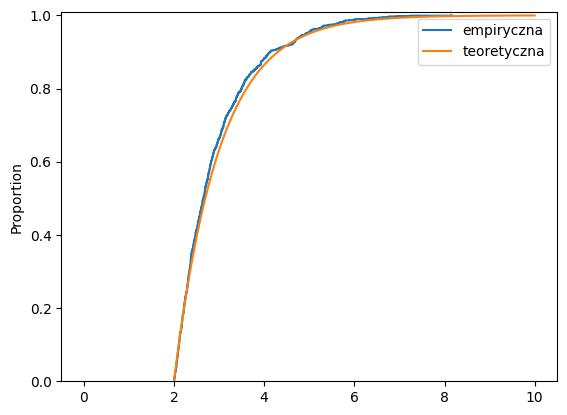

In [28]:
import seaborn as ssn
ssn.ecdfplot(data = Y, label = 'empiryczna' )
plt.plot(xs, ys, label = 'teoretyczna')
plt.ylim(0,1.01)
plt.legend()
plt.show()

In [29]:
def theta_hat(X):
    return min(X)

In [31]:
hats = []
for i in range(n):
    X = np.random.exponential(1, n)
    Y = X + theta
    thetahat = theta_hat(Y)
    hats.append(thetahat)


{'whiskers': [<matplotlib.lines.Line2D at 0x266f1a7cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x266f1a7e310>,
 'boxes': [<matplotlib.lines.Line2D at 0x266f1a47210>],
 'medians': [<matplotlib.lines.Line2D at 0x266f1a7f510>],
 'fliers': [<matplotlib.lines.Line2D at 0x266f1a88110>],
 'means': []}

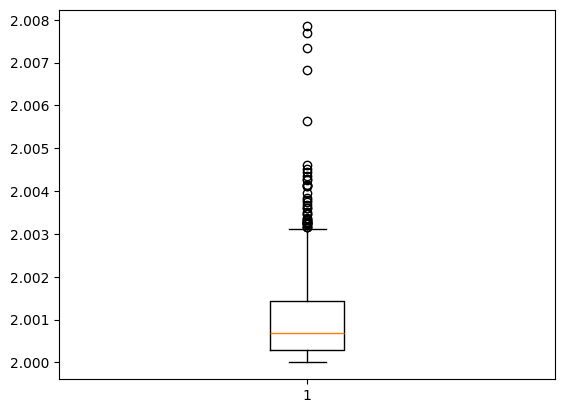

In [32]:
plt.boxplot(hats)

## zadanie 8

In [39]:
mi = 0
sigma = 1

In [34]:
def mi1_hat(X):
    return 1/(2*n+1) * sum(xi for xi in X)

In [35]:
def mi2_hat(X):
    n = len(X)
    if n%2==0:
        s = int(n/2)
        return (sorted(X)[s]+sorted(X)[s+1])/2
    else:
        return sorted(X)[int(n/2)]

In [36]:
def e1(mi, X):
    return (mi1_hat(X) - mi)**2

In [38]:
def e2(mi, X):
    return (mi2_hat(X) - mi)**2

In [41]:
mi1s = []
mi2s = []
e1s = []
e2s = []
for i in range(100):
    X = np.random.normal(mi, sigma, 2*n+1)
    mi1s.append(mi1_hat(X))
    mi2s.append(mi2_hat(X))
    e1s.append(e1(mi, X))
    e2s.append(e2(mi, X))

{'whiskers': [<matplotlib.lines.Line2D at 0x266f1b1d690>,
 'caps': [<matplotlib.lines.Line2D at 0x266f1b1f390>,
 'boxes': [<matplotlib.lines.Line2D at 0x266f1b1c4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x266f1b20690>],
 'fliers': [<matplotlib.lines.Line2D at 0x266f1b21150>],
 'means': []}

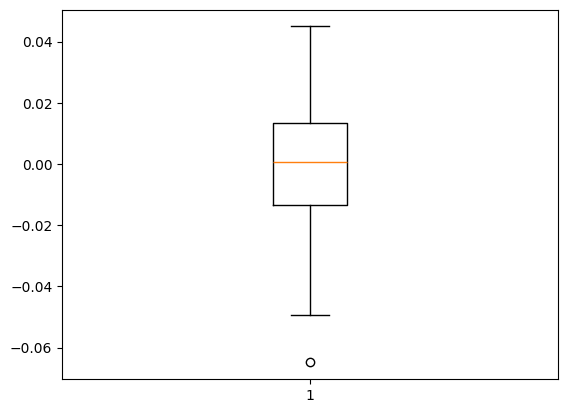

In [42]:
plt.boxplot(mi1s)

{'whiskers': [<matplotlib.lines.Line2D at 0x266f1b7bb90>,
 'caps': [<matplotlib.lines.Line2D at 0x266f1b8d390>,
 'boxes': [<matplotlib.lines.Line2D at 0x266f1b79d90>],
 'medians': [<matplotlib.lines.Line2D at 0x266f1b8e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x266f1b8f110>],
 'means': []}

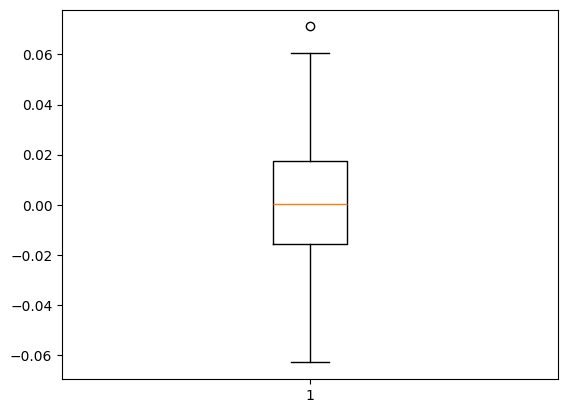

In [43]:
plt.boxplot(mi2s)

In [44]:
np.mean(e1s)

0.0004935110142624425

In [45]:
np.mean(e2s)

0.0007284686362053419

## zadanie 10

In [2]:
def theta1(X):
    return sum(X)/7

In [3]:
def theta2(X):
    return (2*X[0] - X[5] + X[3])/2

In [51]:
mi = 1
sigma2 = 2

In [54]:
Ts1 = []
Ts2 = []
for i in range(1000):
    X = np.random.normal(loc = mi, scale = np.sqrt(sigma2), size = 7)
    T1 = theta1(X)
    T2 = theta2(X)
    Ts1.append(T1)
    Ts2.append(T2)


In [53]:
import seaborn as sns
from scipy.stats import norm


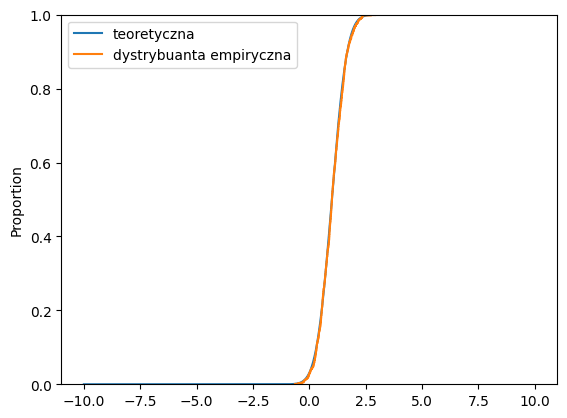

In [55]:
xs = np.linspace(-10,10,1000)
plt.plot(xs, norm.cdf(xs, loc = mi, scale = np.sqrt(sigma2/7)), label = 'teoretyczna')
sns.ecdfplot(data = Ts1, label = 'dystrybuanta empiryczna')
plt.legend()

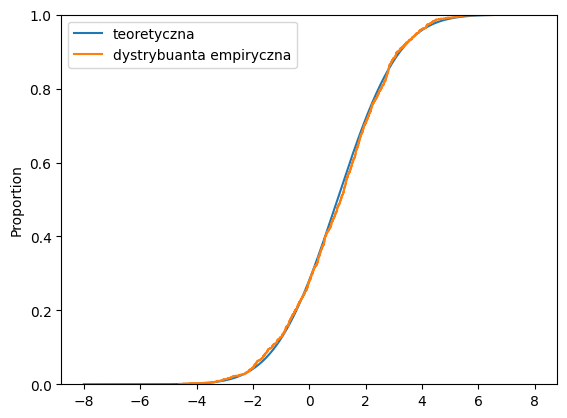

In [56]:
xs = np.linspace(-8,8,1000)
plt.plot(xs, norm.cdf(xs, loc = mi, scale = np.sqrt(3/2*sigma2)), label = 'teoretyczna')
sns.ecdfplot(data = Ts2, label = 'dystrybuanta empiryczna')
plt.legend()

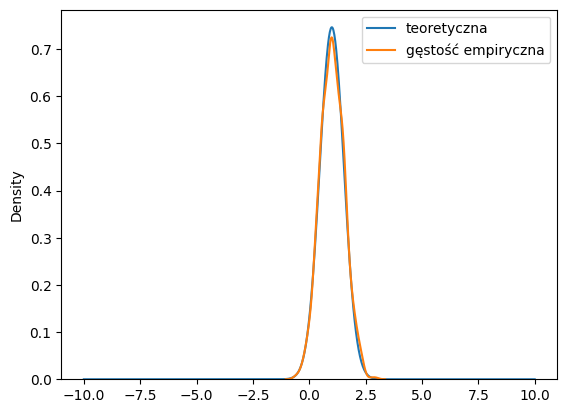

In [57]:
xs = np.linspace(-10,10,1000)
plt.plot(xs, norm.pdf(xs, loc = mi, scale = np.sqrt(sigma2/7)), label = 'teoretyczna')
sns.kdeplot(data = Ts1, label = 'gęstość empiryczna')
plt.legend()

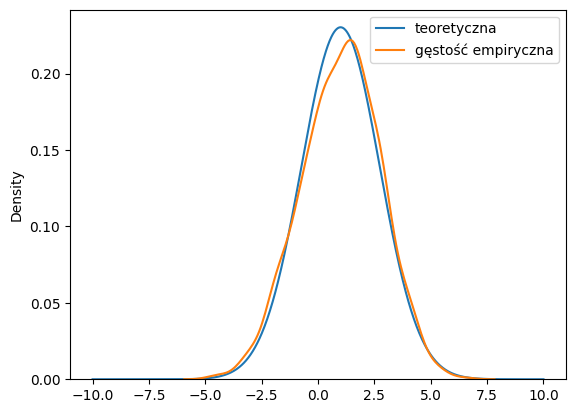

In [58]:
xs = np.linspace(-10,10,1000)
plt.plot(xs, norm.pdf(xs, loc = mi, scale = np.sqrt(3/2*sigma2)), label = 'teoretyczna')
sns.kdeplot(data = Ts2, label = 'gęstość empiryczna')
plt.legend()